# Dataset exploration 

### Import Dataset 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import Workbook

#reading excel file vax_rsa.xlsx and creating a pandas dataframe
df = pd.read_excel('vax_rsa.xlsx', sheet_name='Rawdata')
#df
 

In [2]:
#since there are mixed values for missing data (blank cells and 9), let's standardize the df a bit 
#i chose to convert 9 values to blank cells, since string attributes are left blank and not given any numbers

#for each column, converting values that are 9 to a blank cell (missing value)
for column in df.columns:
    df.loc[df[column] == 9, column] = None
df



,x,Newpatient,Investigationalsite,Typeofthehealthcareinfrastructure,Dateofrecordcreation,Typeofcase,Dateofinclusion,Dateofbirth,Age,Gender,...,AE_fuADD,sistAE_fuADD,localAE_fuADD,OUTCOME,DateofOutcome,TypeofOutcome,timetooutcome,DateofOutcome_updated,TypeofOutcome_updated,timetooutcome_updated
0,Label,New patient,Investigational site,Type of the healthcare infrastructure,Date of record creation,Type of case,Date of inclusion,Date of birth,NaN,NaN,...,NaN,NaN,NaN,NaN,Date of Outcome,Type of Outcome,Days,NaN,NaN,NaN
1,NaN,IT-0111-005876,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-12 00:00:00,Partly retrospective and prospectively continu...,2021-02-10 00:00:00,1947-02-01 00:00:00,74.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,IT-0165-005573,IT-0165,Retirement Home (Casa di Riposo),2021-04-24 00:00:00,Retrospectively observed case,2021-01-20 00:00:00,1935-08-01 00:00:00,85.0,2.0,...,NaN,NaN,NaN,NaN,2021-04-27 00:00:00,No Major Change,13,NaN,NaN,NaN
3,NaN,IT-0110-006618,IT-0110,Nursing-Home (RSA Anziani),2021-05-31 00:00:00,Partly retrospective and prospectively continu...,2021-05-31 00:00:00,1938-05-01 00:00:00,83.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,IT-0110-006619,IT-0110,Nursing-Home (RSA Anziani),2021-05-31 00:00:00,Partly retrospective and prospectively continu...,2021-05-31 00:00:00,1944-10-01 00:00:00,76.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,NaN,IT-0111-006069,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-21 00:00:00,New prospective case,2021-02-09 00:00:00,1946-11-01 00:00:00,74.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3272,NaN,IT-0111-006274,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-26 00:00:00,New prospective case,2021-02-09 00:00:00,1938-06-01 00:00:00,82.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3273,NaN,IT-0111-006352,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-28 00:00:00,New prospective case,2021-02-09 00:00:00,1941-04-01 00:00:00,80.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3274,NaN,IT-0150-006032,IT-0150,Assisted Living (Casa Protetta),2021-05-20 00:00:00,Partly retrospective and prospectively continu...,2021-04-15 00:00:00,1918-01-01 00:00:00,103.0,2.0,...,1.0,1.0,0.0,NaN,NaN,NaN,NaN,2021-07-05 00:00:00,Death,173.0


### mobcat and PA3mcat distinc values 

In [3]:

## showing statisctics about the column mobcat 
#show unique values of column mobcat
print("Unique values: " + str(df['mobcat'].unique()))
#show count for each different value
print("Value counts: ")
print(df['mobcat'].value_counts())
#show the number of missing values for mobcat
print("Missing:" + str(df['mobcat'].isnull().sum()))

# sum all value counts for each unique value of column mobcat and add the number of missing values
print("Total values:" + str(df['mobcat'].value_counts().sum() + df['mobcat'].isnull().sum()))

#do the same for PA3mcat
print("Unique values: " + str(df['PA3mcat'].unique()))
print("Value counts: ")
print(df['PA3mcat'].value_counts())
print("Missing:" + str(df['PA3mcat'].isnull().sum()))
print("Total values:" + str(df['PA3mcat'].value_counts().sum() + df['PA3mcat'].isnull().sum()))

Unique values: [nan  1.  4.  3.  2.  0.  5.]
Value counts: 
1.0    754
0.0    681
3.0    655
2.0    460
4.0    217
5.0    216
Name: mobcat, dtype: int64
Missing:293
Total values:3276
Unique values: ['Usual Physical Activity over the last 3 months' None 4 2 1 0]
Value counts: 
4                                                 1731
2                                                  480
0                                                  472
1                                                  294
Usual Physical Activity over the last 3 months       1
Name: PA3mcat, dtype: int64
Missing:298
Total values:3276


<Axes: >

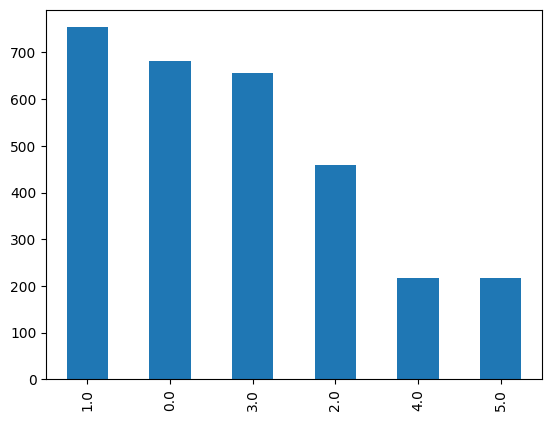

In [4]:
df['mobcat'].value_counts().plot(kind='bar')

In [5]:
print("Unique values: " + str(df['Mobilitylevel'].unique()))

#find correspondent value in mobcat for each value in Mobilitylevel
df1 = df.dropna(subset=['Mobilitylevel'])
df1 = df.dropna(subset=['mobcat'])
unique_values = df1.groupby('Mobilitylevel')['mobcat'].unique().reset_index()
print(unique_values)


Unique values: ['Mobility function (prevalent or most severe condition over the last 3 month):\nOnly one choice, mandatory field'
 nan 'Can walk with a cane'
 'Is confined at home, mostly lying on the bed, sometimes sitting on the wheelchair'
 'Can move around with a wheelchair'
 'Does not move around but is accompanied outside on the wheelchair'
 'Can walk with a walker' 'Can walk independently'
 'Lying on the bed, does not stand up or get in sitting position autonomously']
                                       Mobilitylevel mobcat
0                  Can move around with a wheelchair  [3.0]
1                             Can walk independently  [0.0]
2                               Can walk with a cane  [1.0]
3                             Can walk with a walker  [2.0]
4  Does not move around but is accompanied outsid...  [1.0]
5  Is confined at home, mostly lying on the bed, ...  [4.0]
6  Lying on the bed, does not stand up or get in ...  [5.0]


In [6]:
print("Unique values: " + str(df['PA3months'].unique()))

#find correspondent value in mobcat for each value in Mobilitylevel
df1 = df.dropna(subset=['PA3months'])
df1 = df.dropna(subset=['PA3mcat'])
unique_values = df1.groupby('PA3months')['PA3mcat'].unique().reset_index()

print(unique_values)


Unique values: ['Usual Physical Activity over the last 3 months' nan 'Not evaluable'
 'Walks indoors, any amount of time'
 'Some walking, less than 20 minutes/day or less than 5 days'
 'At least 20-minute walking per day, at least 5 days at week']
                                           PA3months  \
0  At least 20-minute walking per day, at least 5...   
1                                      Not evaluable   
2  Some walking, less than 20 minutes/day or less...   
3     Usual Physical Activity over the last 3 months   
4                  Walks indoors, any amount of time   

                                            PA3mcat  
0                                               [0]  
1                                               [4]  
2                                               [1]  
3  [Usual Physical Activity over the last 3 months]  
4                                               [2]  


In [7]:
#create new column where we merge columns TypeofOutcome and TypeofOutcome_updated. 
#Keep the value if match or if not present in TypeofOutcome_updated, update with type of outcome, 
df['TypeofOutcome_merged'] = df['TypeofOutcome_updated'].combine_first(df['TypeofOutcome'])
#merge the cplum dateofoutcome and dateofoutcome_updated
df['DateofOutcome_merged'] = df['DateofOutcome_updated'].combine_first(df['DateofOutcome'])
#delete first row of dataframe
df = df.iloc[1:]
df

,x,Newpatient,Investigationalsite,Typeofthehealthcareinfrastructure,Dateofrecordcreation,Typeofcase,Dateofinclusion,Dateofbirth,Age,Gender,...,localAE_fuADD,OUTCOME,DateofOutcome,TypeofOutcome,timetooutcome,DateofOutcome_updated,TypeofOutcome_updated,timetooutcome_updated,TypeofOutcome_merged,DateofOutcome_merged
1,NaN,IT-0111-005876,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-12 00:00:00,Partly retrospective and prospectively continu...,2021-02-10 00:00:00,1947-02-01 00:00:00,74.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,IT-0165-005573,IT-0165,Retirement Home (Casa di Riposo),2021-04-24 00:00:00,Retrospectively observed case,2021-01-20 00:00:00,1935-08-01 00:00:00,85.0,2.0,...,NaN,NaN,2021-04-27 00:00:00,No Major Change,13,NaN,NaN,NaN,No Major Change,2021-04-27 00:00:00
3,NaN,IT-0110-006618,IT-0110,Nursing-Home (RSA Anziani),2021-05-31 00:00:00,Partly retrospective and prospectively continu...,2021-05-31 00:00:00,1938-05-01 00:00:00,83.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,IT-0110-006619,IT-0110,Nursing-Home (RSA Anziani),2021-05-31 00:00:00,Partly retrospective and prospectively continu...,2021-05-31 00:00:00,1944-10-01 00:00:00,76.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,IT-0110-006620,IT-0110,Nursing-Home (RSA Anziani),2021-05-31 00:00:00,Partly retrospective and prospectively continu...,2021-05-31 00:00:00,1934-06-01 00:00:00,86.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,NaN,IT-0111-006069,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-21 00:00:00,New prospective case,2021-02-09 00:00:00,1946-11-01 00:00:00,74.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3272,NaN,IT-0111-006274,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-26 00:00:00,New prospective case,2021-02-09 00:00:00,1938-06-01 00:00:00,82.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3273,NaN,IT-0111-006352,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-28 00:00:00,New prospective case,2021-02-09 00:00:00,1941-04-01 00:00:00,80.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3274,NaN,IT-0150-006032,IT-0150,Assisted Living (Casa Protetta),2021-05-20 00:00:00,Partly retrospective and prospectively continu...,2021-04-15 00:00:00,1918-01-01 00:00:00,103.0,2.0,...,0.0,NaN,NaN,NaN,NaN,2021-07-05 00:00:00,Death,173.0,Death,2021-07-05 00:00:00


In [8]:
#convert all missing values in the dataframe to 9s
dfnines=df.fillna(9)
dfnines

,x,Newpatient,Investigationalsite,Typeofthehealthcareinfrastructure,Dateofrecordcreation,Typeofcase,Dateofinclusion,Dateofbirth,Age,Gender,...,localAE_fuADD,OUTCOME,DateofOutcome,TypeofOutcome,timetooutcome,DateofOutcome_updated,TypeofOutcome_updated,timetooutcome_updated,TypeofOutcome_merged,DateofOutcome_merged
1,9,IT-0111-005876,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-12 00:00:00,Partly retrospective and prospectively continu...,2021-02-10 00:00:00,1947-02-01,74.0,1.0,...,9.0,9.0,9,9,9,9,9,9.0,9,9
2,9,IT-0165-005573,IT-0165,Retirement Home (Casa di Riposo),2021-04-24 00:00:00,Retrospectively observed case,2021-01-20 00:00:00,1935-08-01,85.0,2.0,...,9.0,9.0,2021-04-27 00:00:00,No Major Change,13,9,9,9.0,No Major Change,2021-04-27 00:00:00
3,9,IT-0110-006618,IT-0110,Nursing-Home (RSA Anziani),2021-05-31 00:00:00,Partly retrospective and prospectively continu...,2021-05-31 00:00:00,1938-05-01,83.0,2.0,...,9.0,9.0,9,9,9,9,9,9.0,9,9
4,9,IT-0110-006619,IT-0110,Nursing-Home (RSA Anziani),2021-05-31 00:00:00,Partly retrospective and prospectively continu...,2021-05-31 00:00:00,1944-10-01,76.0,2.0,...,9.0,9.0,9,9,9,9,9,9.0,9,9
5,9,IT-0110-006620,IT-0110,Nursing-Home (RSA Anziani),2021-05-31 00:00:00,Partly retrospective and prospectively continu...,2021-05-31 00:00:00,1934-06-01,86.0,2.0,...,9.0,9.0,9,9,9,9,9,9.0,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,9,IT-0111-006069,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-21 00:00:00,New prospective case,2021-02-09 00:00:00,1946-11-01,74.0,2.0,...,9.0,9.0,9,9,9,9,9,9.0,9,9
3272,9,IT-0111-006274,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-26 00:00:00,New prospective case,2021-02-09 00:00:00,1938-06-01,82.0,2.0,...,9.0,9.0,9,9,9,9,9,9.0,9,9
3273,9,IT-0111-006352,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-28 00:00:00,New prospective case,2021-02-09 00:00:00,1941-04-01,80.0,2.0,...,9.0,9.0,9,9,9,9,9,9.0,9,9
3274,9,IT-0150-006032,IT-0150,Assisted Living (Casa Protetta),2021-05-20 00:00:00,Partly retrospective and prospectively continu...,2021-04-15 00:00:00,1918-01-01,103.0,2.0,...,0.0,9.0,9,9,9,2021-07-05 00:00:00,Death,173.0,Death,2021-07-05 00:00:00


In [9]:
#check how many withdrawal cases we have column TypeofOutcome_merged
print("Value counts: ")
print(dfnines['TypeofOutcome_merged'].value_counts())


Value counts: 
No Major Change                                                      2009
Death                                                                 595
9                                                                     506
Transfer to a different hospital / structure                           83
Withdrawal                                                             39
Serious Adverse Event (other than death) includes hospitalisation      26
Clinical Improvement                                                   17
Name: TypeofOutcome_merged, dtype: int64


### Checking for missing values caused by patient death

In [10]:
from datetime import datetime, timedelta

def extrac_date(datetime_str):
    date = datetime.strptime(datetime_str, "%Y-%m-%d %H:%M:%S")
    return date

def confront_date(dateofFirstDose, dateofDeath, dateOffset):
# calculate difference with offset of dateOffset months 
    months_after_dose= dateofFirstDose + timedelta(days=dateOffset*30) 

    if months_after_dose < dateofDeath:
        return 0 #patient died after 2 months
    else:
        return 1 #patient died before 2 months


def check_death(row, dateOffset):
    #dateOffset = 12
    #for every row (patient) check if TypeOfOutcome is missing
    if row['sierologico01']==1:
        if row['TypeofOutcome_merged'] != 9:
            if row['TypeofOutcome_merged'] == 'Death':
                if row['Datefirstdose'] != 9:
                    if row['DateofOutcome'] != 9:
                        #convert the dates to datetime format
                        outcome = extrac_date(str(row['DateofOutcome_merged']))
                        inclusion = extrac_date(str(row['Datefirstdose']))
                
                        died = confront_date(inclusion, outcome, dateOffset)

                        if row['antiS_'+str(dateOffset)] ==9:
                            
                            return died
                        else:
                            return died
                            
                    else:
                     return 0
                else: 
                    return 0
            else:
                return 0
        else:
            return 0  
    else:
        return 0


In [11]:
#apply the function to each row of the dataframe 
#create a column for people who died before sierological check and after 2 months
dfnines['DeathB4twoMonths'] = dfnines.apply(check_death, axis=1, args=(2,))
#create a column for people who died before sierological check and after 6 months
dfnines['DeathB4sixMonths'] = dfnines.apply(check_death, axis=1, args=(6,))
#create a column for people who died before sierological check and after 12 months
dfnines['DeathB4twelveMonths'] = dfnines.apply(check_death, axis=1, args=(12,))

#create column of difference between DeathB4twoMonths and DeathB4sixMonths
dfnines['Difference6_2'] = dfnines['DeathB4sixMonths'] - dfnines['DeathB4twoMonths']
#create column of difference between DeathB4twoMonths and DeathB4twelveMonths
dfnines['Difference12_6'] = dfnines['DeathB4twelveMonths'] - dfnines['DeathB4sixMonths']

#show the dataframe
dfnines

,x,Newpatient,Investigationalsite,Typeofthehealthcareinfrastructure,Dateofrecordcreation,Typeofcase,Dateofinclusion,Dateofbirth,Age,Gender,...,DateofOutcome_updated,TypeofOutcome_updated,timetooutcome_updated,TypeofOutcome_merged,DateofOutcome_merged,DeathB4twoMonths,DeathB4sixMonths,DeathB4twelveMonths,Difference6_2,Difference12_6
1,9,IT-0111-005876,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-12 00:00:00,Partly retrospective and prospectively continu...,2021-02-10 00:00:00,1947-02-01,74.0,1.0,...,9,9,9.0,9,9,0,0,0,0,0
2,9,IT-0165-005573,IT-0165,Retirement Home (Casa di Riposo),2021-04-24 00:00:00,Retrospectively observed case,2021-01-20 00:00:00,1935-08-01,85.0,2.0,...,9,9,9.0,No Major Change,2021-04-27 00:00:00,0,0,0,0,0
3,9,IT-0110-006618,IT-0110,Nursing-Home (RSA Anziani),2021-05-31 00:00:00,Partly retrospective and prospectively continu...,2021-05-31 00:00:00,1938-05-01,83.0,2.0,...,9,9,9.0,9,9,0,0,0,0,0
4,9,IT-0110-006619,IT-0110,Nursing-Home (RSA Anziani),2021-05-31 00:00:00,Partly retrospective and prospectively continu...,2021-05-31 00:00:00,1944-10-01,76.0,2.0,...,9,9,9.0,9,9,0,0,0,0,0
5,9,IT-0110-006620,IT-0110,Nursing-Home (RSA Anziani),2021-05-31 00:00:00,Partly retrospective and prospectively continu...,2021-05-31 00:00:00,1934-06-01,86.0,2.0,...,9,9,9.0,9,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,9,IT-0111-006069,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-21 00:00:00,New prospective case,2021-02-09 00:00:00,1946-11-01,74.0,2.0,...,9,9,9.0,9,9,0,0,0,0,0
3272,9,IT-0111-006274,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-26 00:00:00,New prospective case,2021-02-09 00:00:00,1938-06-01,82.0,2.0,...,9,9,9.0,9,9,0,0,0,0,0
3273,9,IT-0111-006352,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-28 00:00:00,New prospective case,2021-02-09 00:00:00,1941-04-01,80.0,2.0,...,9,9,9.0,9,9,0,0,0,0,0
3274,9,IT-0150-006032,IT-0150,Assisted Living (Casa Protetta),2021-05-20 00:00:00,Partly retrospective and prospectively continu...,2021-04-15 00:00:00,1918-01-01,103.0,2.0,...,2021-07-05 00:00:00,Death,173.0,Death,2021-07-05 00:00:00,0,0,0,0,0


In [12]:
#print the number of people who died before sierological check and after 2, 6 and 12 months
print('Died B4 antiS_2: ' + str(dfnines['DeathB4twoMonths'].sum()))
print('Died B4 antiS_6: ' + str(dfnines['DeathB4sixMonths'].sum()))
print('Died B4 antiS_12: ' + str(dfnines['DeathB4twelveMonths'].sum()))
print('New deaths between antiS_2 and antiS_6: ' + str(dfnines['Difference6_2'].sum()))
print('New deaths between antiS_6 and antiS_12: ' + str(dfnines['Difference12_6'].sum()))
sum = dfnines['Difference6_2'].sum()+dfnines['Difference12_6'].sum()+dfnines['DeathB4twoMonths'].sum()
#print missing values for antiS_2, antiS_6 and antiS_12 due to patient death
print('Missing values due to patient death: ' + str(sum))


Died B4 antiS_2: 22
Died B4 antiS_6: 48
Died B4 antiS_12: 56
New deaths between antiS_2 and antiS_6: 26
New deaths between antiS_6 and antiS_12: 8
Missing values due to patient death: 56


In [13]:
#create new column in dfnines that for each row stores a 1 if both values from FU2date and WHO_f2 are missing, 0 instead
dfnines['FU2andWHO_f2'] = dfnines.apply(lambda row: 1 if row['FU2date'] == 9 and row['WHO_f2'] == 9 else 0, axis=1)
dfnines['FU3andWHO_f3'] = dfnines.apply(lambda row: 1 if row['FU3date'] == 9 and row['WHO_f3'] == 9 else 0, axis=1)
dfnines['FU4andWHO_f4'] = dfnines.apply(lambda row: 1 if row['FU4date'] == 9 and row['WHO_f4'] == 9 else 0, axis=1)
dfnines['FU0andWHO_f0'] = dfnines.apply(lambda row: 1 if row['FU1date'] == 9 and row['WHO_f1'] == 9 else 0, axis=1)
dfnines

,x,Newpatient,Investigationalsite,Typeofthehealthcareinfrastructure,Dateofrecordcreation,Typeofcase,Dateofinclusion,Dateofbirth,Age,Gender,...,DateofOutcome_merged,DeathB4twoMonths,DeathB4sixMonths,DeathB4twelveMonths,Difference6_2,Difference12_6,FU2andWHO_f2,FU3andWHO_f3,FU4andWHO_f4,FU0andWHO_f0
1,9,IT-0111-005876,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-12 00:00:00,Partly retrospective and prospectively continu...,2021-02-10 00:00:00,1947-02-01,74.0,1.0,...,9,0,0,0,0,0,1,1,1,1
2,9,IT-0165-005573,IT-0165,Retirement Home (Casa di Riposo),2021-04-24 00:00:00,Retrospectively observed case,2021-01-20 00:00:00,1935-08-01,85.0,2.0,...,2021-04-27 00:00:00,0,0,0,0,0,1,1,1,1
3,9,IT-0110-006618,IT-0110,Nursing-Home (RSA Anziani),2021-05-31 00:00:00,Partly retrospective and prospectively continu...,2021-05-31 00:00:00,1938-05-01,83.0,2.0,...,9,0,0,0,0,0,1,1,1,1
4,9,IT-0110-006619,IT-0110,Nursing-Home (RSA Anziani),2021-05-31 00:00:00,Partly retrospective and prospectively continu...,2021-05-31 00:00:00,1944-10-01,76.0,2.0,...,9,0,0,0,0,0,1,1,1,1
5,9,IT-0110-006620,IT-0110,Nursing-Home (RSA Anziani),2021-05-31 00:00:00,Partly retrospective and prospectively continu...,2021-05-31 00:00:00,1934-06-01,86.0,2.0,...,9,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,9,IT-0111-006069,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-21 00:00:00,New prospective case,2021-02-09 00:00:00,1946-11-01,74.0,2.0,...,9,0,0,0,0,0,1,1,1,0
3272,9,IT-0111-006274,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-26 00:00:00,New prospective case,2021-02-09 00:00:00,1938-06-01,82.0,2.0,...,9,0,0,0,0,0,1,1,1,0
3273,9,IT-0111-006352,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-28 00:00:00,New prospective case,2021-02-09 00:00:00,1941-04-01,80.0,2.0,...,9,0,0,0,0,0,1,1,1,0
3274,9,IT-0150-006032,IT-0150,Assisted Living (Casa Protetta),2021-05-20 00:00:00,Partly retrospective and prospectively continu...,2021-04-15 00:00:00,1918-01-01,103.0,2.0,...,2021-07-05 00:00:00,0,0,0,0,0,0,0,1,0


In [14]:
#create a function that fot every patient correlates the fact that they have a missing value for antiS_2, anti_S6 and anti_S12 with the fact that they died (TypeofOutcome = 'Death')
from datetime import datetime, timedelta

#if they have a missing value for antiS_2, anti_S6 and anti_S12 and they died, check if they died
def extrac_date(datetime_str):
    date = datetime.strptime(datetime_str, "%Y-%m-%d %H:%M:%S")
    return date

def confront_date(dateofFirstDose, dateofDeath, dateOffset):
# calculate difference with offset of dateOffset months 
    months_after_dose= dateofFirstDose + timedelta(days=dateOffset*30) 

    if months_after_dose < dateofDeath:
        return 0 #patient died after 2 months
    else:
        return 1 #patient died before 2 months


def check_deathWHO(row, dateOffset, strFU, F1date):
    #dateOffset = 12
    #for every row (patient) check if missing data WHO
    if row[strFU] == 1:

        if row['TypeofOutcome_merged'] == 'Death':
            if row['DateofOutcome_merged'] !=9:
                if row[F1date] != 9 :
                    outcome = extrac_date(str(row['DateofOutcome_merged']))
                    baseline = extrac_date(str(row[F1date]))
                    died = confront_date(baseline, outcome, dateOffset)
                    return died
            return 0
        return 0
    else:
        return 0


In [15]:
#apply the function to each row of the dataframe 
#create a column for people who died before sierological check and after 2 months
dfnines['DeathB4F2'] = dfnines.apply(check_deathWHO, axis=1, args=(2,'FU2andWHO_f2', 'FU1date',))
dfnines['DeathB4F3'] = dfnines.apply(check_deathWHO, axis=1, args=(6,'FU3andWHO_f3', 'FU1date',))
dfnines['DeathB4F4'] = dfnines.apply(check_deathWHO, axis=1, args=(12,'FU4andWHO_f4', 'FU1date',))

dfnines

,x,Newpatient,Investigationalsite,Typeofthehealthcareinfrastructure,Dateofrecordcreation,Typeofcase,Dateofinclusion,Dateofbirth,Age,Gender,...,DeathB4twelveMonths,Difference6_2,Difference12_6,FU2andWHO_f2,FU3andWHO_f3,FU4andWHO_f4,FU0andWHO_f0,DeathB4F2,DeathB4F3,DeathB4F4
1,9,IT-0111-005876,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-12 00:00:00,Partly retrospective and prospectively continu...,2021-02-10 00:00:00,1947-02-01,74.0,1.0,...,0,0,0,1,1,1,1,0,0,0
2,9,IT-0165-005573,IT-0165,Retirement Home (Casa di Riposo),2021-04-24 00:00:00,Retrospectively observed case,2021-01-20 00:00:00,1935-08-01,85.0,2.0,...,0,0,0,1,1,1,1,0,0,0
3,9,IT-0110-006618,IT-0110,Nursing-Home (RSA Anziani),2021-05-31 00:00:00,Partly retrospective and prospectively continu...,2021-05-31 00:00:00,1938-05-01,83.0,2.0,...,0,0,0,1,1,1,1,0,0,0
4,9,IT-0110-006619,IT-0110,Nursing-Home (RSA Anziani),2021-05-31 00:00:00,Partly retrospective and prospectively continu...,2021-05-31 00:00:00,1944-10-01,76.0,2.0,...,0,0,0,1,1,1,1,0,0,0
5,9,IT-0110-006620,IT-0110,Nursing-Home (RSA Anziani),2021-05-31 00:00:00,Partly retrospective and prospectively continu...,2021-05-31 00:00:00,1934-06-01,86.0,2.0,...,0,0,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,9,IT-0111-006069,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-21 00:00:00,New prospective case,2021-02-09 00:00:00,1946-11-01,74.0,2.0,...,0,0,0,1,1,1,0,0,0,0
3272,9,IT-0111-006274,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-26 00:00:00,New prospective case,2021-02-09 00:00:00,1938-06-01,82.0,2.0,...,0,0,0,1,1,1,0,0,0,0
3273,9,IT-0111-006352,IT-0111,Medicalized Nursing-home (RSA Medicalizzata),2021-05-28 00:00:00,New prospective case,2021-02-09 00:00:00,1941-04-01,80.0,2.0,...,0,0,0,1,1,1,0,0,0,0
3274,9,IT-0150-006032,IT-0150,Assisted Living (Casa Protetta),2021-05-20 00:00:00,Partly retrospective and prospectively continu...,2021-04-15 00:00:00,1918-01-01,103.0,2.0,...,0,0,0,0,0,1,0,0,0,1


In [16]:
print(dfnines['DeathB4F2'].sum())
print(dfnines['DeathB4F3'].sum())
print(dfnines['DeathB4F4'].sum())


34
64
225


In [17]:
#calculate percentage of people who died before F2 on the total of FU2andWHO_f2 missing values = 1
print("Percentage of people who died before FU2 on total missing values for F2: "+str(dfnines['DeathB4F2'].sum()/dfnines['FU2andWHO_f2'].sum() * 100))
#calculate percentage of people who died before F3 on the total of FU3andWHO_f3 missing values = 1
print("Percentage of people who died before FU3 on total missing values for F3: "+str(dfnines['DeathB4F3'].sum()/dfnines['FU3andWHO_f3'].sum() * 100))
#calculate percentage of people who died before F4 on the total of FU4andWHO_f4 missing values = 1
print("Percentage of people who died before FU4 on total missing values for F4: "+str(dfnines['DeathB4F4'].sum()/dfnines['FU4andWHO_f4'].sum() * 100))


Percentage of people who died before FU2 on total missing values for F2: 17.989417989417987
Percentage of people who died before FU3 on total missing values for F3: 22.535211267605636
Percentage of people who died before FU4 on total missing values for F4: 42.29323308270676


In [18]:
# only keep columns from TypeofOutcome_merged to deathB4F4
dfexp = dfnines[['Newpatient', 'TypeofOutcome_merged', 'DateofOutcome_merged','DeathB4twoMonths', 'DeathB4sixMonths','DeathB4twelveMonths','Difference6_2','Difference12_6','FU2andWHO_f2', 'FU3andWHO_f3', 'FU4andWHO_f4', 'DeathB4F2', 'DeathB4F3', 'DeathB4F4']]
dfexp

,Newpatient,TypeofOutcome_merged,DateofOutcome_merged,DeathB4twoMonths,DeathB4sixMonths,DeathB4twelveMonths,Difference6_2,Difference12_6,FU2andWHO_f2,FU3andWHO_f3,FU4andWHO_f4,DeathB4F2,DeathB4F3,DeathB4F4
1,IT-0111-005876,9,9,0,0,0,0,0,1,1,1,0,0,0
2,IT-0165-005573,No Major Change,2021-04-27 00:00:00,0,0,0,0,0,1,1,1,0,0,0
3,IT-0110-006618,9,9,0,0,0,0,0,1,1,1,0,0,0
4,IT-0110-006619,9,9,0,0,0,0,0,1,1,1,0,0,0
5,IT-0110-006620,9,9,0,0,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,IT-0111-006069,9,9,0,0,0,0,0,1,1,1,0,0,0
3272,IT-0111-006274,9,9,0,0,0,0,0,1,1,1,0,0,0
3273,IT-0111-006352,9,9,0,0,0,0,0,1,1,1,0,0,0
3274,IT-0150-006032,Death,2021-07-05 00:00:00,0,0,0,0,0,0,0,1,0,0,1
